# xgBoost : Google Bert augmented Dataset

In [1]:
!pip install nlpaug

     |████████████████████████████████| 389kB 4.1MB/s 


In [2]:
!pip install transformers

     |████████████████████████████████| 1.8MB 4.3MB/s 
     |████████████████████████████████| 890kB 41.9MB/s 
     |████████████████████████████████| 2.9MB 52.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=f41b51fe913693c7e8686f0e4a8c34d2dc2e1c360943c8f4bd7d1a9e6734d19c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=c6b08fc65de094e3d465e0487a27b13c894e3b83f33dae7e19af47a14a9a9b15
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#https://stackoverflow.com/questions/62117483/import-module-in-google-colab-from-google-drive-python
sys.path.append('/content/gdrive/MyDrive/CS--2/')
#import module_1_xml_to_df
#from module_1_xml_to_df import convert_xml_to_DataFrame
from module_2_preprocessing import Data_Preprocessing

Uninstalling nltk-3.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/nltk-3.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.4MB 5.3MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=64ff274c35cff2b6c4082997a38010774ad95c1b669ba6366fb389dca13249c9
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{"you'd", 'me', 'doesn', 'myself', 'most', 'ours', 'those', 'whom', 'his', 'or', 'them', 'your', 'where', 'haven', "wasn't", 'should', "that'll", 'had', 'against', 'can', 'from', 'as', 'so', 'down', "hasn't", 'hers', 'while', 'this', 'and', 'what', 'under', 'aren', 'below', 're', 'her', 'above', 'will', "shan't", 'shan', 'that', 'each', 'did', "doesn't", 'hasn', 'shouldn', 'more', 'very', 'such', 've', 'how', "aren't", 'once', "mustn't", 'out', 'all', 'm', "she's", 'ma', 'been', "wouldn't", 'if', 'no', 'i', 'herself', 'nor', 'does', 'a', "haven't", "weren't", "you've", 'am', 'too', 'are', 'we', 'with', 'd', 'ourselves', "you'll", 'isn', 'but', 'wasn', 'its', 'on', 'himself', 'itself', 'theirs', 'their', 'both', 'when', "needn't", 'at', 'these', 'it', 'he', 'has', 'own', 'just', 'any', 'o', 'she', 'who', 'because', 'after', 'further', 'having', 'in', 'other', "hadn't", 'which', 'couldn', "won't", 'won', 'for', 'about', 'be', 'same', 'themselves', 'you', 'our', 'over', 'few', "isn't", 'h

In [6]:
import nlpaug.augmenter.word as naw
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics  
import xgboost as xgb 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

### 1. laoding calss data_augmentation_with_Google_bert

In [7]:
class data_augmentation_with_Google_bert:
  def __init__(self,per):
    self.per = per

  #https://github.com/samhavens/roundtrip
  def google_bert_function(self , dataset , len_of_aug_data) :
      col_name = dataset.columns
      aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute")
      
      for r in range(0,len_of_aug_data):
        dataset=shuffle(dataset)
        sentence = aug.augment(dataset[col_name[1]][r])
        aspect_term = dataset[col_name[2]][r] 
        aspect_cat = dataset[col_name[3]][r]
        label = dataset[col_name[4]][r]
        #print(sentence)
        new_data = pd.DataFrame([[sentence,aspect_term, aspect_cat , label]],columns=['text', 'aspect_term', 'aspect_category', 'polarity'])
        #print(new_data)
        dataset = dataset.append(new_data, ignore_index=True)
        #print(dataset.shape)
      return dataset

  def augmentation(self , data):
    if type(data) == pd.core.series.Series:                     # if the givne datatype is series or list or numpy array
      data = pd.DataFrame(data)                                 # it will get converted into standard Dataframe format
    elif type(data) == list or type(data) == np.ndarray:        # for further calculations
      data = pd.DataFrame(data = data)
    else:
      pass
    
    len_of_data = data.shape[0]
    partition = int((self.per /100)*len_of_data)

    data = shuffle(data)
    data = self.google_bert_function(data , partition)
    
    return data  

## 2.Loading the data

In [8]:
restaurant_data = pd.read_csv("/content/gdrive/MyDrive/CS--2/restaurant_train_data_semeval_14.csv")

In [9]:
restaurant_data.shape

(3044, 5)

In [ ]:
da = data_augmentation_with_Google_bert(per= 100)

In [ ]:
augmented_data_restaurant = da.augmentation(restaurant_data )

In [ ]:
# saving the dataframe 
augmented_data_restaurant.to_csv('/content/gdrive/MyDrive/CS--2/augmented_data_restaurant_bert.csv',index= False) 

## 3. Loading the google bert augmented data

In [11]:
augmented_data_restaurant = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant_bert.csv")

In [12]:
augmented_data_restaurant.head()

,id,text,aspect_term,aspect_category,polarity
0,141.0,this dish is my favorite and i always get it w...,dish,food,positive
1,NaN,i think that it actually is absolutely brillia...,NaN,anecdotes/miscellaneous,positive
2,91.0,i will be going back and heartily recommend it!,NaN,anecdotes/miscellaneous,positive
3,1094.0,the food is amazing!!!!,food,food,positive
4,946.0,"we only ordered desserts and drinks, but no re...",drinks,service,negative


In [13]:
augmented_data_restaurant.shape

(6088, 5)

In [14]:
augmented_data_restaurant.groupby('aspect_category').size().sort_values(ascending=False)

aspect_category
anecdotes/miscellaneous    2091
food                       1692
service                     952
ambience                    784
price                       569
dtype: int64

In [15]:
catagories = augmented_data_restaurant['aspect_category'].unique()
catagories , len(catagories)

(array(['food', 'anecdotes/miscellaneous', 'service', 'ambience', 'price'],
       dtype=object), 5)

In [16]:
polarity = augmented_data_restaurant['polarity'].unique()
polarity

array(['positive', 'negative', 'conflict', 'neutral'], dtype=object)

## 4. Aspect Based Sentiment Analysis

In [17]:
X = augmented_data_restaurant['text']
Y = augmented_data_restaurant['aspect_category']

### 4.1 Splitting the data 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


In [21]:
dp = Data_Preprocessing()

In [22]:
X_train_review = dp.preprocess_text(X_train)

100%|██████████| 4870/4870 [00:04<00:00, 1210.68it/s]


In [23]:
X_test_review = dp.preprocess_text(X_test)

100%|██████████| 1218/1218 [00:00<00:00, 1944.66it/s]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer    
vectorizer_sit = CountVectorizer(min_df=3,max_features=50000)  
vectorizer_sit.fit(X_train_review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50000, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
preprocessed_train_review = vectorizer_sit.transform(X_train_review).toarray()    # produces a sparse representation of preprocessed sentences
print("Shape of matrix data after one hot encoding for train: ",preprocessed_train_review .shape)

Shape of matrix data after one hot encoding for train:  (4870, 2537)


In [26]:
preprocessed_test_review = vectorizer_sit.transform(X_test_review).toarray()    
print("Shape of matrix data after one hot encoding for train: ",preprocessed_test_review.shape)

Shape of matrix data after one hot encoding for train:  (1218, 2537)


### 4.2 xgboost model

In [27]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [29]:
# making predictions on the testing set 
y_pred_cat = reg.predict(preprocessed_test_review)

In [30]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

75.72895277207392

In [31]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 

metrics.accuracy_score(y_test, y_pred_cat)*100

71.51067323481116

### 4.3 Classification report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat ,target_names= catagories))

                         precision    recall  f1-score   support

                   food       0.92      0.45      0.60       164
anecdotes/miscellaneous       0.65      0.87      0.74       400
                service       0.69      0.73      0.71       355
               ambience       0.88      0.52      0.66       113
                  price       0.83      0.70      0.76       186

               accuracy                           0.72      1218
              macro avg       0.79      0.65      0.69      1218
           weighted avg       0.75      0.72      0.71      1218



### Observation :
This is the classification report of aspect category based sentiment model for bert augmented data showing the precision, recall, f1_score and support values for all 5 unique catagories with accuracy 72 percent 

### 4.4 Confusion matrix representation

In [34]:
# code borrowed from Microsoft Malware Detection Assignment
def plot_confusion_matrix(test_y, predict_y ,labels):
    C = confusion_matrix(test_y, predict_y)      # calculation of confusion matrix 
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y))    # number of misclassified points while predicting y
 
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = labels                 
    cmap=sns.light_palette("purple")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in recall matrix",A.sum(axis=1))

Number of misclassified points  0.2848932676518883
-------------------------------------------------- Confusion matrix --------------------------------------------------


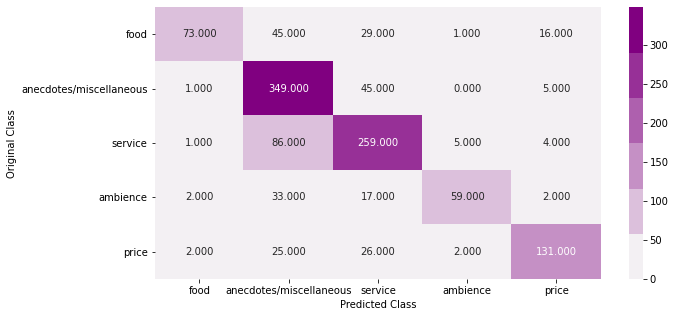

-------------------------------------------------- Precision matrix --------------------------------------------------


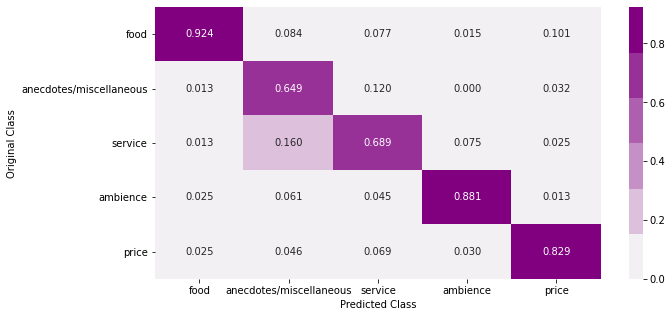

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


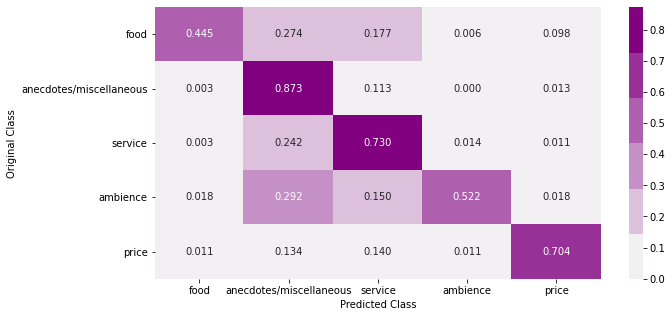

Sum of rows in recall matrix [1. 1. 1. 1. 1.]


In [35]:
plot_confusion_matrix(y_test,  y_pred_cat, catagories)

## 5. Polarity Based Sentiment Model

In [37]:
X = augmented_data_restaurant['text']
Y = augmented_data_restaurant['polarity']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


## 5.1 xgboost model 

In [40]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [42]:
# making predictions on the testing set 
y_pred_polarity = reg.predict(preprocessed_test_review)

In [43]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

69.34291581108829

In [44]:
metrics.accuracy_score(y_test, y_pred_polarity)*100

69.12972085385879

### 5.3. classification report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_polarity ,target_names= polarity))

              precision    recall  f1-score   support

    positive       0.78      0.25      0.38        55
    negative       0.77      0.37      0.50       273
    conflict       0.87      0.19      0.31       177
     neutral       0.67      0.97      0.79       713

    accuracy                           0.69      1218
   macro avg       0.77      0.45      0.50      1218
weighted avg       0.73      0.69      0.64      1218



### 5.4 Confusion matrix representation

Number of misclassified points  0.30870279146141216
-------------------------------------------------- Confusion matrix --------------------------------------------------


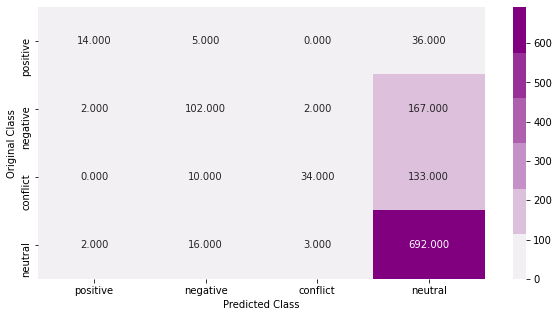

-------------------------------------------------- Precision matrix --------------------------------------------------


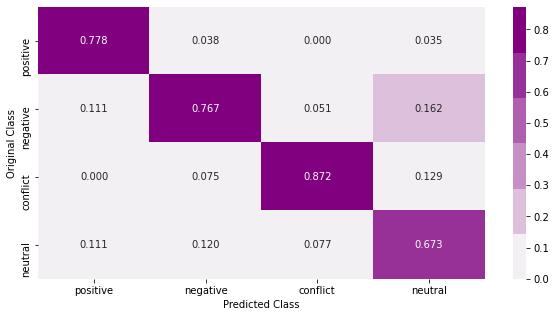

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


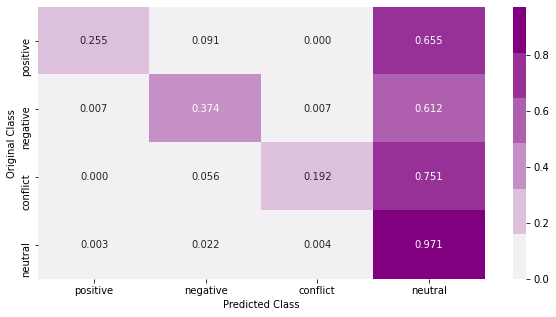

Sum of rows in recall matrix [1. 1. 1. 1.]


In [45]:
plot_confusion_matrix(y_test,  y_pred_polarity, polarity)

## 6. creating a resultant dataframe

In [47]:
def create_result_dataframe(pred_1,pred_2):
  # Calling DataFrame constructor on predicted outputs
  resultant_df = pd.DataFrame(list(zip(pred_1,pred_2)), columns = ["predicted_catagories" , "predicted_polarity"])
  result  = pd.crosstab(resultant_df.predicted_catagories,resultant_df.predicted_polarity ,margins = True , margins_name = "Total")
  result["Ranking"] = ( result.Total/resultant_df.shape[0]) * 5.0 
  result["Negative in %"] = (result.negative/result.Total) * 100
  result["Neutral in %"] = (result.neutral/result.Total) * 100
  result["Positive in %"] = (result.positive/result.Total) * 100
  result["conflict in %"] = (result.conflict/result.Total) * 100
  del result["negative"]
  del result["neutral"]
  del result["positive"]
  del result["Total"]
  del result["conflict"]

  return result

In [48]:
result = create_result_dataframe(y_pred_cat,y_pred_polarity)

In [49]:
result

predicted_polarity,Ranking,Negative in %,Neutral in %,Positive in %,conflict in %
predicted_catagories,,,,,
ambience,0.324302,3.797468,1.265823,91.139241,3.797468
anecdotes/miscellaneous,2.208539,9.107807,6.133829,84.014870,0.743494
food,1.543514,8.244681,0.797872,89.095745,1.861702
price,0.275041,19.402985,1.492537,79.104478,0.000000
service,0.648604,23.417722,0.632911,73.417722,2.531646
Total,5.000000,10.919540,3.201970,84.400657,1.477833


### Observation :
   Above result shows that the Ranking and all Polarities in percentages for all aspect catagories from which we can see that anecdotes/miscellaneous have the highest ranking of 2.20 . and ambience catagory have highest positive polarity